In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

necessary imports

In [2]:

x = np.array([0,1,2,3,4])
y  = np.array([0,1,2,3,4])
x,y = np.meshgrid(x,y)


creates a meshgrid to establish the environment for training

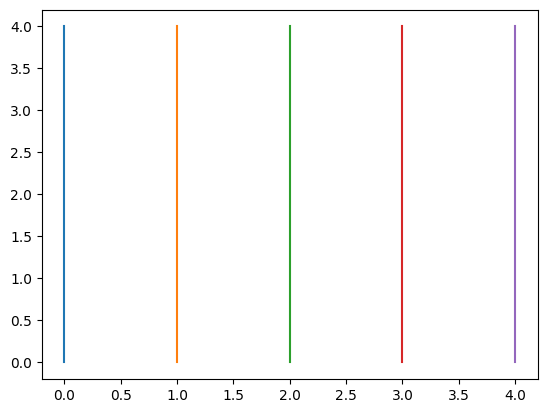

In [3]:
plt.plot(x,y)

prints out the grid

In [4]:
actions = ['up','down','left','right']


makes a array of actions that the agent can do

In [5]:
x.fill(0)
y.fill(0)

fills the grid with 0

In [6]:
x[-1, -1] = 1
y[-1, -1] = 1

makes the bottom right corner equal to 1 as 1 symbolizes the terminal

In [7]:
terminal = 1

creates a variable to set the terminal value to 1

In [8]:
Q = np.zeros((5, 5, 4))  # shape: (rows, cols, actions)

creates a 3d Q table

In [9]:
actions = ['up', 'down', 'left', 'right']

In [10]:
def move_agent(choice, x, y):
    if choice == 'up' and y < 4:
        y += 1
    elif choice == 'down' and y > 0:
        y -= 1
    elif choice == 'left' and x > 0:
        x -= 1
    elif choice == 'right' and x < 4:
        x += 1
    return (x, y)

creates a function that will move the agent and makes sure it doesnt go out of bounds

In [11]:
alpha = 0.6
gamma = 0.7
epsilon = 0.5
episodes = 1000

creates variables for alpha, gamma, episolon and episodes

In [12]:
initial_x = 0
initial_y = 0
goal_state = (4, 4)

for episode in range(episodes):
    x, y = initial_x, initial_y
    while (x, y) != goal_state:
        # Choose action using epsilon-greedy
        if random.uniform(0, 1) < epsilon:
            action_index = random.randint(0, 3)
        else:
            action_index = np.argmax(Q[x][y])

        action = actions[action_index]
        next_x, next_y = move_agent(action, x, y)

        reward = 1 if (next_x, next_y) == goal_state else 0
        max_future_q = np.max(Q[next_x][next_y])
        current_q = Q[x][y][action_index]

        # Q-learning update
        Q[x][y][action_index] = current_q + alpha * (reward + gamma * max_future_q - current_q)

        # Move to next state
        x, y = next_x, next_y


this implements the episilon greedy method to determine the ideal path for the agent

In [13]:
grid_size = 5
actions = ['up', 'down', 'left', 'right']
action_map = {0: '↑', 1: '↓', 2: '←', 3: '→'}
goal_state = (4, 4)
policy_grid = np.full((grid_size, grid_size), ' ', dtype=str)
for x in range(grid_size):
    for y in range(grid_size):
        if (x, y) == goal_state:
            policy_grid[x, y] = '🎯'
        else:
            best_action = np.argmax(Q[x, y])
            policy_grid[x, y] = action_map[best_action]

creates the grid to represent the agents movement

In [14]:
# Display policy as DataFrame
pd.DataFrame(policy_grid)

,0,1,2,3,4
0,↑,↑,↑,↑,→
1,↑,↑,↑,↑,→
2,↑,→,↑,↑,→
3,→,↑,↑,↑,→
4,↑,↑,↑,↑,🎯


prints out the policy grid

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


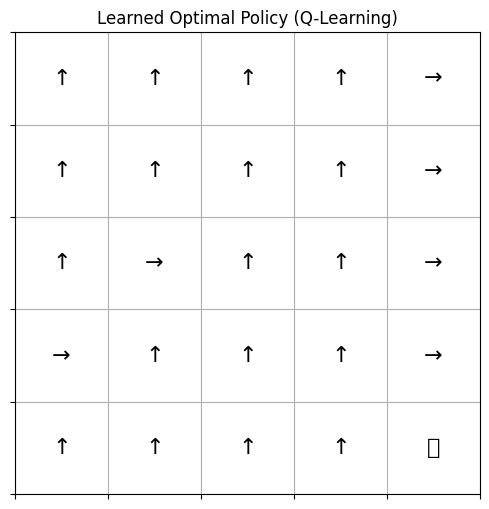

In [15]:
# Plot policy grid
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-0.5, grid_size - 0.5)
ax.set_ylim(-0.5, grid_size - 0.5)
ax.set_xticks(np.arange(-0.5, grid_size, 1))
ax.set_yticks(np.arange(-0.5, grid_size, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True)

for x in range(grid_size):
    for y in range(grid_size):
        symbol = policy_grid[x, y]
        ax.text(y, grid_size - 1 - x, symbol, ha='center', va='center', fontsize=16)

ax.set_title("Learned Optimal Policy (Q-Learning)")
plt.show()

creates a graphical representation of the agents movement